In [1]:
# first import the whole package
import PyAPD

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


In [2]:
apd1 = PyAPD.apd_system()

In [3]:
apd1.N

10

In [4]:
apd1.D

2

In [5]:
apd1.dt

torch.float32

In [6]:
apd1.device

'cpu'

In [7]:
apd1.error_tolerance

0.01

In [8]:
apd1.radius_of_exclusion

0.01

In [9]:
apd1.ani_thres

0.25

In [10]:
apd1.seed

-1

In [11]:
apd1.det_constraint

True

In [12]:
apd1.heuristic_W

False

In [13]:
apd1.pixel_size_prefactor

2

In [14]:
apd1.domain

tensor([[0., 1.],
        [0., 1.]])

In [15]:
apd1.X

tensor([[0.4073, 0.8538],
        [0.9564, 0.9683],
        [0.1820, 0.9134],
        [0.2161, 0.4545],
        [0.3441, 0.6001],
        [0.5449, 0.3669],
        [0.1758, 0.4862],
        [0.5204, 0.0112],
        [0.6284, 0.3541],
        [0.5881, 0.0854]])

In [16]:
apd1.As

tensor([[[ 0.8067, -0.3731],
         [-0.3731,  1.4122]],

        [[ 1.5883,  0.3331],
         [ 0.3331,  0.6995]],

        [[ 1.3005, -0.5258],
         [-0.5258,  0.9816]],

        [[ 0.7093, -0.2476],
         [-0.2476,  1.4963]],

        [[ 1.1995, -0.2992],
         [-0.2992,  0.9083]],

        [[ 0.8124, -0.0251],
         [-0.0251,  1.2317]],

        [[ 0.8159, -0.4699],
         [-0.4699,  1.4963]],

        [[ 1.0533, -0.0226],
         [-0.0226,  0.9499]],

        [[ 0.8237,  0.0899],
         [ 0.0899,  1.2238]],

        [[ 1.3798, -0.1268],
         [-0.1268,  0.7364]]])

In [17]:
apd1.target_masses

tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])

In [18]:
apd1.W

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
apd1.pixel_params

(62, 62)

In [20]:
apd1.optimality

False

In [21]:
apd1.assemble_pixels()

In [22]:
apd1.Y

tensor([[0.0081, 0.0081],
        [0.0081, 0.0242],
        [0.0081, 0.0403],
        ...,
        [0.9919, 0.9597],
        [0.9919, 0.9758],
        [0.9919, 0.9919]])

In [23]:
apd1.y

In [24]:
apd1.x

In [25]:
apd1.PS

tensor([0.0003, 0.0003, 0.0003,  ..., 0.0003, 0.0003, 0.0003])

In [26]:
apd1.assemble_apd()

tensor([7, 3, 3,  ..., 1, 1, 1])

(<Figure size 756x756 with 1 Axes>, <Axes: >)

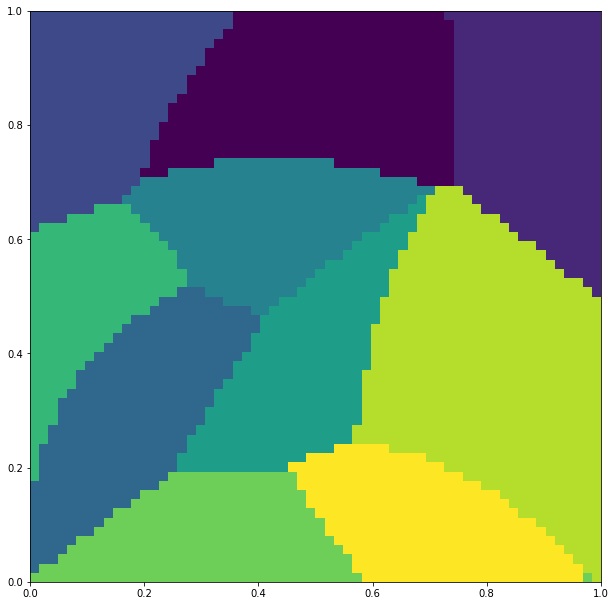

In [27]:
apd1.plot_apd()

In [28]:
apd1.check_optimality()

Precision loss detected!
Percentage error =  83.66217803955078


In [29]:
apd1.find_optimal_W()

Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0010)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.046445
         Iterations: 12
         Function evaluations: 14
It took 0.03750967979431152 seconds to find optimal W.


In [30]:
apd1.check_optimality()

The APD is optimal!
Percentage error =  0.6760880351066589


(<Figure size 756x756 with 1 Axes>, <Axes: >)

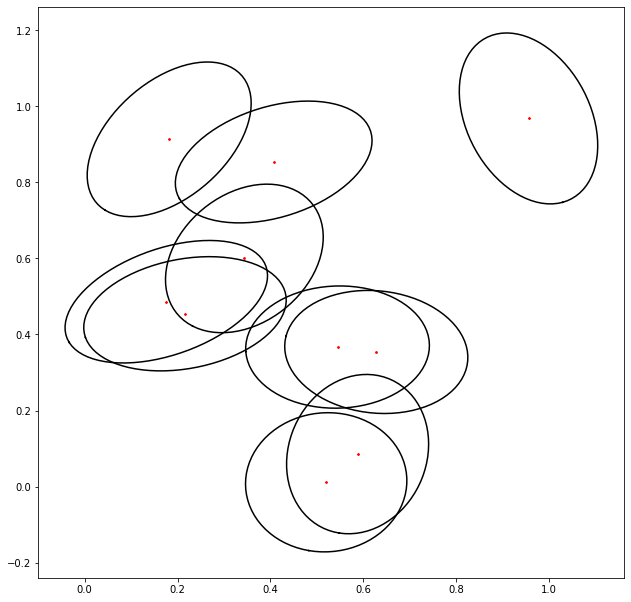

In [31]:
apd1.plot_ellipses()

In [33]:
apd1.Lloyds_algorithm(verbosity_level=2)

Lloyds iteration: 0
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0010)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.019060
         Iterations: 1
         Function evaluations: 3
It took 0.0050525665283203125 seconds to find optimal W.
The APD is optimal!
Percentage error =  0.9362325072288513
Lloyds iteration: 1
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0010)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.018776
         Iterations: 3
         Function evaluations: 5
It took 0.01519632339477539 seconds to find optimal W.
The APD is optimal!
Percentage error =  0.8847787976264954
Lloyds iteration: 2
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0010)
Optimality condition successfully overwritten.
Optimization terminated succ

(<Figure size 756x756 with 1 Axes>, <Axes: >)

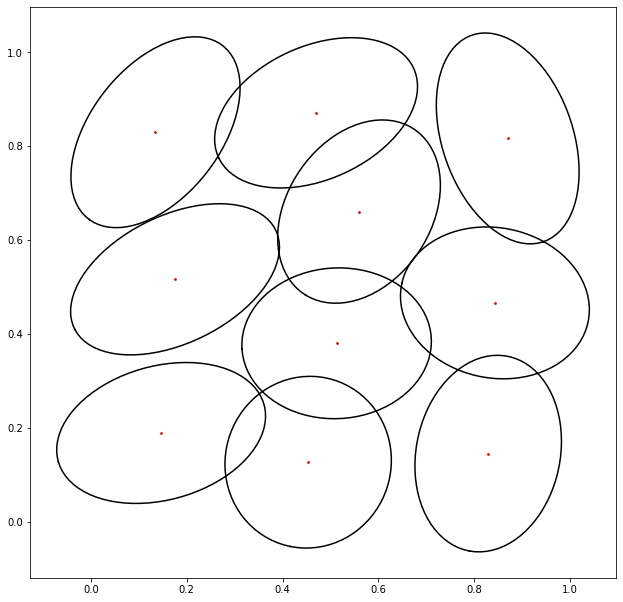

In [34]:
apd1.plot_ellipses()

(<Figure size 756x756 with 1 Axes>, <Axes: >)

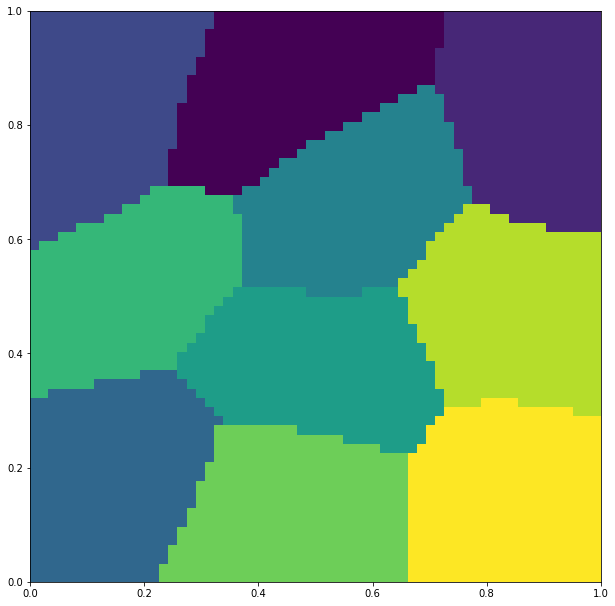

In [35]:
apd1.plot_apd()

In [36]:
# first import the whole package
import PyAPD

# then (re)load all the functions in the .py files in the .../PyPolyCrystals/ directory:
from PyAPD import *

torch.set_printoptions(precision=10) # show more digits

device = "cuda" if torch.cuda.is_available() else "cpu"
dt = torch.float64
torch.set_default_dtype(dt)
#torch.set_default_device(device)

import copy

import scipy
import scipy.stats
dist_volumes = getattr(scipy.stats, 'lognorm')
arg = 1.0
loc = 0.5
scale = 1.0

In [37]:
#multi or single phase
mp = False

# D = 2  # Dimension of the ambient space
# #Ms = [1200]
# Ns = [25,50,100,250,500,1000,2500,5000]

D = 3  # Dimension of the ambient space
#Ms = [200]
Ns = [10,40]

roe = 0.2

apd = apd_system(N=Ns[0], D=D,dt=torch.float64,
                  pixel_size_prefactor = 2,
                  ani_thres = 0.3,
                  radius_of_exclusion = roe,
                  heuristic_W = False)

file_name = f'optimal_apd_{D}D_{"mp" if mp else "sp"}_{roe}.pkl'

print(file_name)

dts = [torch.float64] # single precision or double precision
anisotropies = [0.25]
seeds = [i for i in range(2)]

total_no_data_points = len(Ns)*len(anisotropies)*len(seeds)
print(*Ns)
print(*dts)
print(*anisotropies)
print(*seeds)

optimal_apd_3D_sp_0.2.pkl
10 40
torch.float64
0.25
0 1


In [38]:
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("FAKE FIRST RUN")

kk=-1
for seed in seeds[:1]:
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print("Random seed =", seed)
    apd.seed = seed
    for dt in dts[:1]:
        torch.set_default_dtype(dt)
        apd.dt = dt        
        for ani_thres in anisotropies[:1]:
            apd.ani_thres = ani_thres
            for N in Ns[:1]:
                print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
                print("N = ", N, "seed = ", seed, "ani_thres = ", ani_thres)
                kk+= 1
                apd.optimality = False
                apd.N = N
                
                ### SAMPLING
                # to ensure consistenscy, we want to do the sampling in single precision
                torch.set_default_dtype(torch.float32)
                
                ### sampling seed points
                torch.manual_seed(seed)
                X = sample_seeds_with_exclusion(N,dim=D,radius_prefactor = apd.radius_of_exclusion)
                
                ### sampling anisotropy matrices
                torch.manual_seed(seed+10)
                As = sample_normalised_spd_matrices(N,dim = D, ani_thres = ani_thres)
                
                # ### sampling target masses (optional)
                if mp:
                    np.random.seed(seed=seed + 20)
                    target_masses = dist_volumes.rvs(arg, loc=loc, scale=scale,size=N)
                    target_masses = torch.from_numpy(target_masses/target_masses.sum()).to(device,dtype=dt)
                
                ### back to the precision we actually want to work with
                ### (when populating the class, the conversion will take place automatically):
                torch.set_default_dtype(apd.dt)
                apd.set_X(X=X)
                apd.set_As(As=As)
                if mp:
                    apd.set_target_masses(target_masses = target_masses)
                else:
                    apd.set_target_masses()
                apd.set_W()
                #apd.set_pixel_params(pixel_params = (1200,)*apd.D)
                apd.set_pixel_params()
                apd.assemble_pixels()
                #apd.assemble_apd(verbose=True,record_time = True)
                apd.find_optimal_W(record_time = True,max_iter = 2000)
                #apd.data[kk] = copy.copy(apd.__dict__)

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
FAKE FIRST RUN
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Random seed = 0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
N =  10 seed =  0 ani_thres =  0.25
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0010000000)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.095774
         Iterations: 6
         Function evaluations: 7
It took 0.02389383316040039 seconds to find optimal W.


In [39]:
counter = 0
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print("ACTUAL RUN")
kk=-1
for seed in seeds:
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
    print("Random seed =", seed)
    apd.seed = seed
    for dt in dts:
        torch.set_default_dtype(dt)
        apd.dt = dt        
        for ani_thres in anisotropies:
            apd.ani_thres = ani_thres
            for N in Ns:
                print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
                print("N = ", N, "seed = ", seed, "ani_thres = ", ani_thres)
                kk+= 1
                print("Populating data point",kk+1, " / ", total_no_data_points)
                apd.optimality = False
                apd.N = N
                
                ### SAMPLING
                # to ensure consistenscy, we want to do the sampling in single precision
                torch.set_default_dtype(torch.float32)
                
                ### sampling seed points
                torch.manual_seed(seed)
                X = sample_seeds_with_exclusion(N,dim=D,radius_prefactor = apd.radius_of_exclusion)
                
                ### sampling anisotropy matrices
                torch.manual_seed(seed+10)
                As = sample_normalised_spd_matrices(N,dim = D, ani_thres = ani_thres)
                
                ### sampling target masses (optional)
                if mp:
                    np.random.seed(seed=seed+20)
                    target_masses = dist_volumes.rvs(arg, loc=loc, scale=scale,size=N)
                    target_masses = torch.from_numpy(target_masses/target_masses.sum()).to(device,dtype=dt)

                ### back to the precision we actually want to work with
                ### (when populating the class, the conversion will take place automatically):
                torch.set_default_dtype(apd.dt)
                apd.set_X(X=X)
                apd.set_As(As=As)
                if mp:
                    apd.set_target_masses(target_masses = target_masses)
                else:
                    apd.set_target_masses()
                apd.set_W()
                #apd.set_pixel_params(pixel_params = (1200,)*apd.D)
                apd.set_pixel_params(verbose=True)
                apd.assemble_pixels()
                #apd.assemble_apd(verbose=True,record_time = True)
                apd.find_optimal_W(record_time = True, max_iter = 2000)
                apd.check_optimality()
                if apd.optimality == False:
                    counter += 1
                apd.Y = None
                apd.PS = None
                apd.y = None
                apd.a = None
                apd.x = None
                #apd.W = None
                apd.w = None
                
                d = apd.__dict__
                apd.data[kk] = copy.copy({i:d[i] for i in d if i!='data'})

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
ACTUAL RUN
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Random seed = 0
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
N =  10 seed =  0 ani_thres =  0.25
Populating data point 1  /  4
M =  18
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0010000000)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.095774
         Iterations: 6
         Function evaluations: 7
It took 0.01941990852355957 seconds to find optimal W.
The APD is optimal!
Percentage error =  0.9945130315492517
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
N =  40 seed =  0 ani_thres =  0.25
Populating data point 2  /  4
M =  30
Solver tolerance is with respect to each grain separately.
Smallest tol:  tensor(0.0002500000)
Optimality condition successfully overwritten.
Optimization terminated successfully.
         Current function value: -0.046455
         Iterati

In [44]:
total_no_data_points

4